In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [20]:
file = "../../../../../dataframes/enoe/SDEMT/df_09_impute.csv"


In [21]:
df <- read.csv(file = file)
data <- df
head(data)

est,t_loc,sex,eda,nac_dia,nac_mes,nac_anio,l_nac_c,cs_p12,cs_p13_1,⋯,ma48me1sm,p14apoyos,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins
10,1,1,46,31,3,1969,15,1,2,⋯,0,2,4,1,1,1,0,1,7,8
10,1,2,48,28,8,1967,15,1,2,⋯,0,2,19,1,1,2,0,2,1,9
10,1,1,23,17,10,1992,15,1,7,⋯,0,2,7,1,2,2,0,3,2,2
10,1,2,18,12,4,1997,15,1,4,⋯,0,2,0,1,0,0,0,0,0,0
10,1,1,36,31,12,1979,9,1,4,⋯,0,2,0,1,0,0,0,0,0,0
10,1,2,31,6,4,1984,9,1,4,⋯,0,2,16,1,2,2,0,3,2,7


In [22]:
ncol(data)

[1] 68

In [23]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [24]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
est,0.9930616
t_loc,0.3160565
sex,0.6927138
eda,4.3866805
nac_dia,3.4174432
nac_mes,2.4782084


In [25]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
7,nac_anio,4.393284
4,eda,4.386681
5,nac_dia,3.417443
6,nac_mes,2.478208
51,anios_esc,2.441580
52,hrsocup,2.157129


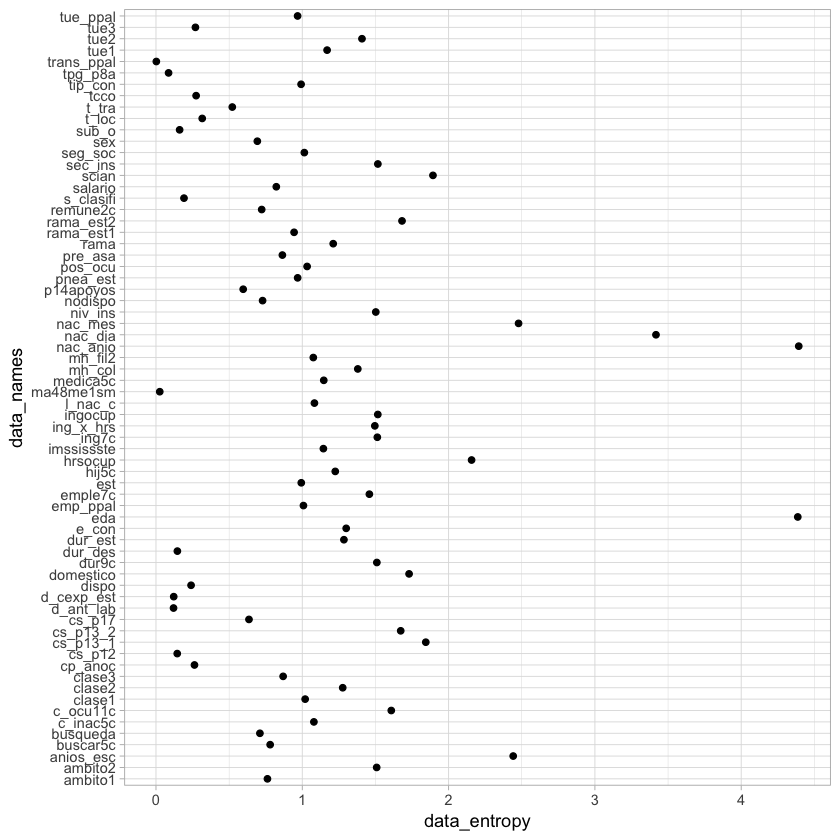

In [26]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

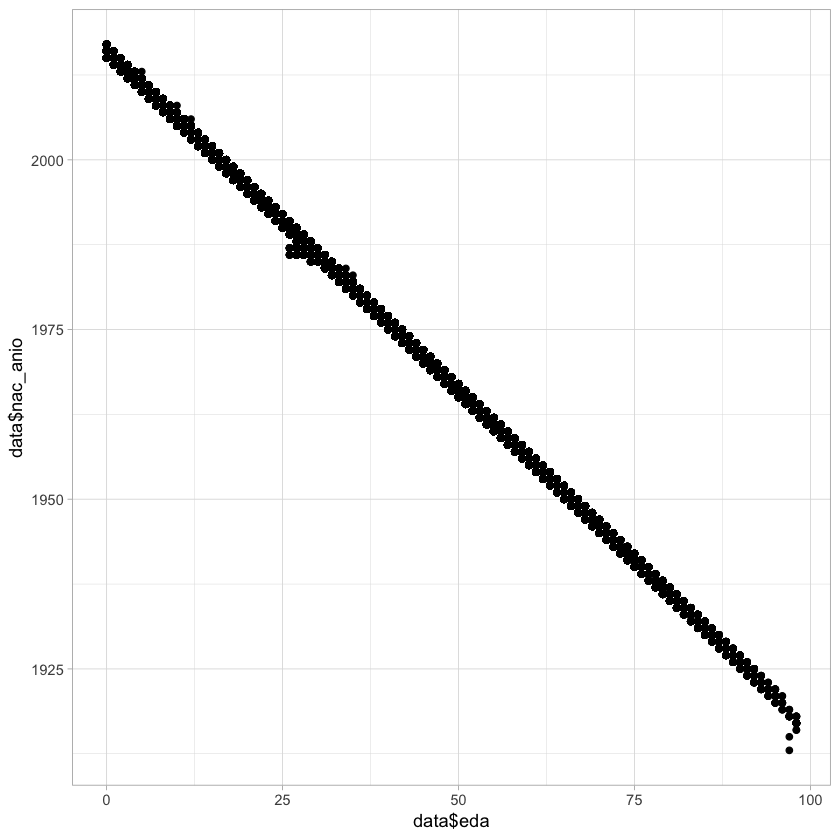

In [27]:
ggplot(data = data, 
       aes(y=data$nac_anio, 
           x=data$eda)) + geom_point() + theme_light()

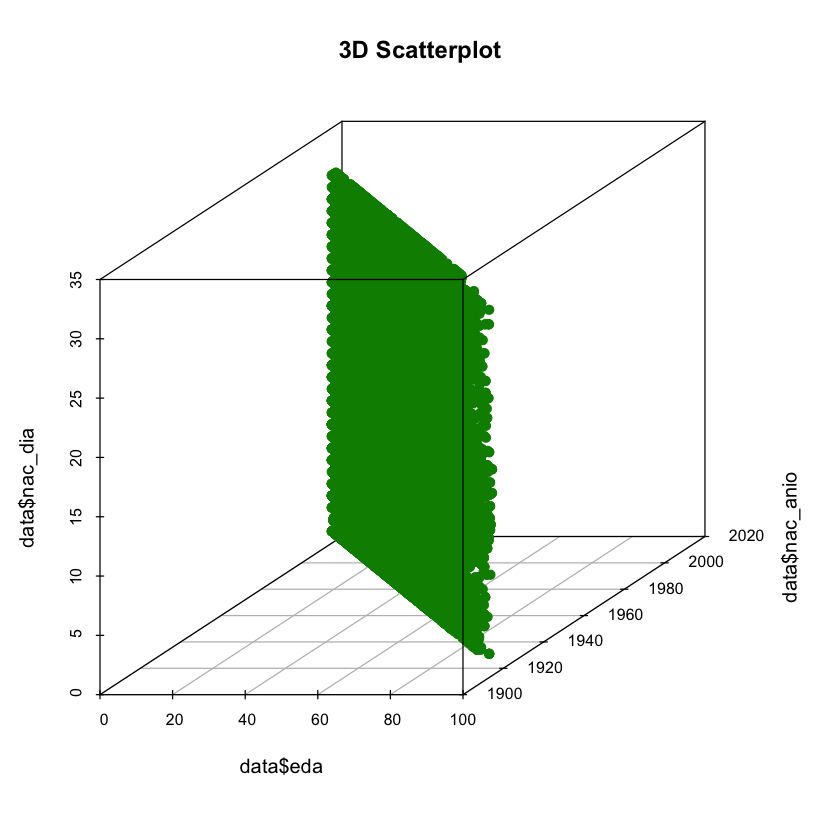

In [28]:
scatterplot3d(y=data$nac_anio, 
              x=data$eda,
              z=data$nac_dia, pch = 19, color = "green4", main="3D Scatterplot")





In [29]:
file = "../../../../../dataframes/enoe/SDEMT/df_09_entropy_og_mixed.csv"


In [30]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
